In [23]:
import os
if not os.path.exists('data'):
    os.makedirs('data')

!curl -L -o data/final_database.csv "https://www.dropbox.com/scl/fi/j0yasupjf1nln4jhh40hd/final_database.csv?rlkey=gxa8cqm23y9owq1lcuuzgvub4&st=0o9qf8tk&dl=0"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    17  100    17    0     0     30      0 --:--:-- --:--:-- --:--:--     0-:--:--    30
100  107M  100  107M    0     0  11.2M      0  0:00:09  0:00:09 --:--:-- 12.8M


## Library imports

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

## Data path

In [25]:
DATA_PATH = 'data/final_database.csv'

We first read the dataset

In [26]:
data = pd.read_csv(DATA_PATH)
data.head()

/var/folders/d_/x1jfcqpx1cl4zcrx9bzpclq00000gn/T/ipykernel_19595/230350411.py:1: DtypeWarning: Columns (7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(DATA_PATH)


,Country,Uri,Popularity,Title,Artist,Album/Single,Genre,Artist_followers,Explicit,Album,Release_date,Track_number,Tracks_in_album,danceability,energy,key,loudness,mode,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,time_signature,Genre_new,Days_since_release,Released_after_2017,Explicit_false,Explicit_true,album,compilation,single,bolero,boy band,country,dance/electronic,else,funk,hip hop,house,indie,jazz,k-pop,latin,metal,opm,pop,r&b/soul,rap,reggae,reggaeton,rock,trap,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,LDA_Topic,Celebrate,Desire,Explore,Fun,Hope,Love,Nostalgia,Thug,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Argentina,Australia,Austria,Belgium,Brazil,Canada,Chile,Colombia,Costa Rica,Denmark,Ecuador,Finland,France,Germany,Global,Indonesia,Ireland,Italy,Malaysia,Mexico,Netherlands,New Zealand,Norway,Peru,Philippines,Poland,Portugal,Singapore,Spain,Sweden,Switzerland,Taiwan,Turkey,UK,USA,Popu_max,Top10_dummy,Top50_dummy,Cluster
0,Global,https://open.spotify.com/track/6FyRXC8tJUh863J...,31833.95,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,1.0,1.0,global
1,USA,https://open.spotify.com/track/6FyRXC8tJUh863J...,8.00,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,191,0.0,0.0,english speaking and nordic
2,Argentina,https://open.spotify.com/track/6FyRXC8tJUh863J...,76924.40,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0,1.0,spanish speaking
3,Belgium,https://open.spotify.com/track/6FyRXC8tJUh863J...,849.60,adan y eva,Paulo Londra,single,argentine hip hop,11427104.0,False,Adan y Eva,2018-11-05,1,1,0.767,0.709,1,-4.47,1,0.336,0.323,0.0,0.0676,0.72,171.993,258639,4,hip hop,740.0,1.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,126,0.0,0.0,english speaking and nordic
4,Switzerland,https://open.spotify.com/track/6FyRXC8tJUh863J...,20739.10,adan y 

We print the different columns

In [27]:
for i, column in enumerate(data.columns):
    print(i, column)

0 Country
1 Uri
2 Popularity
3 Title
4 Artist
5 Album/Single
6 Genre
7 Artist_followers
8 Explicit
9 Album
10 Release_date
11 Track_number
12 Tracks_in_album
13 danceability
14 energy
15 key
16 loudness
17 mode
18 speechiness
19 acoustics
20 instrumentalness
21 liveliness
22 valence
23 tempo
24 duration_ms
25 time_signature
26 Genre_new
27 Days_since_release
28 Released_after_2017
29 Explicit_false
30 Explicit_true
31 album
32 compilation
33 single
34 bolero
35 boy band
36 country
37 dance/electronic
38 else
39 funk
40 hip hop
41 house
42 indie
43 jazz
44 k-pop
45 latin
46 metal
47 opm
48 pop
49 r&b/soul
50 rap
51 reggae
52 reggaeton
53 rock
54 trap
55 syuzhet_norm
56 bing_norm
57 afinn_norm
58 nrc_norm
59 syuzhet
60 bing
61 afinn
62 nrc
63 anger
64 anticipation
65 disgust
66 fear
67 joy
68 sadness
69 surprise
70 trust
71 negative
72 positive
73 n_words
74 anger_norm
75 anticipation_norm
76 disgust_norm
77 fear_norm
78 joy_norm
79 sadness_norm
80 surprise_norm
81 trust_norm
82 negative

We will drop columns that are one-hot-encoded countries, genres, topics, and other columns that are not useful for our analysis

In [28]:
countries = list(data.columns[112:147]) 

genres = list(data.columns[34:55])

lda_topics = list(data.columns[101:109])

columns_to_drop = countries +  genres + lda_topics + ["Uri", "Track_number", "Tracks_in_album", "Explicit_false", "Explicit_true", "album", "single",
                                                 "bolero", "Released_after_2017"]

We process the release date to get the year and month

In [29]:
data_filtered = data.drop(columns = columns_to_drop)
data_filtered["Release_date"] = pd.to_datetime(data_filtered["Release_date"].apply(lambda x: np.nan if x == "n-a" else x), format = "mixed")

Data description

In [30]:
data_filtered.describe()

,Popularity,Release_date,Days_since_release,compilation,syuzhet_norm,bing_norm,afinn_norm,nrc_norm,syuzhet,bing,afinn,nrc,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive,n_words,anger_norm,anticipation_norm,disgust_norm,fear_norm,joy_norm,sadness_norm,surprise_norm,trust_norm,negative_norm,positive_norm,anger_norm2,anticipation_norm2,disgust_norm2,fear_norm2,joy_norm2,sadness_norm2,surprise_norm2,trust_norm2,negative_norm2,positive_norm2,negative_bog_jr,positive_bog_jr,Bayes,Negative_Bayes,Neutral_Bayes,Positive_Bayes,bing_norm_negative,bing_norm_neutral,bing_norm_positive,Popu_max,Top10_dummy,Top50_dummy
count,170633.000000,170628,167411.000000,170633.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71392.000000,71449.000000,71449.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,71866.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000,170633.000000
mean,5417.616264,2016-10-08 15:17:31.466347776,1337.530228,0.015026,0.057969,-0.189603,-0.055423,0.023168,-0.018181,-1.083197,-2.512649,0.008432,2.787020,3.120432,1.929814,2.957129,3.191662,2.757911,1.876687,3.215443,5.433139,5.441572,313.905421,0.008396,0.010360,0.005804,0.009313,0.010905,0.008997,0.006219,0.010330,0.017027,0.017758,0.114947,0.150568,0.079596,0.127251,0.163345,0.129950,0.087283,0.147060,0.483059,0.516941,3.595803,7.447833,-0.220842,0.582584,0.055673,0.361743,0.226668,0.047693,0.146812,89.926738,0.087035,0.294843
min,0.800000,1899-12-31 00:00:00,9.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-22.500000,-31.000000,-70.000000,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,77.600000,2017-06-02 00:00:00,428.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.650000,-3.000000,-7.000000,-2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,206.000000,0.003333,0.005155,0.000000,0.003876,0.005357,0.003906,0.002710,0.005051,0.008949,0.010230,0.062500,0.096774,0.000000,0.076923,0.093750,0.071429,0.044444,0.095238,0.350000,0.378378,0.000000,2.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,515.150000,2018-07-20 00:00:00,834.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.200000,-1.000000,0.000000,0.000000,2.000000,3.000000,1.000000,2.000000,3.000000,2.000000,2.000000,3.000000,4.000000,4.000000,285.000000,0.007220,0.009174,0.004854,0.007812,0.009501,0.007772,0.005505,0.009009,0.015152,0.015748,0.115385,0.142857,0.076923,0.125000,0.148936,0.125000,0.083333,0.142857,0.500000,0.500000,1.000000,5.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.000000,0.000000,0.000000
75%,3867.850000,2019-09-06 00:00:00,1240.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.900000,1.000000,4.000000,2.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,7.000000,7.000000,386.000000,0.012346,0.013986,0.008621,0.013308,0.014458,0.012500,0.008734,0.014019,0.022814,0.023188,0.166667,0.200000,0.117647,0.172414,0.214286,0.176471,0.121212,0.200000,0.621622,0.650000,5.000000,10.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,138.000000,0.000000,1.000000
max,23376

In [31]:
print("Number of attributes:", len(data_filtered.columns))
print("Number of unique songs:", data["Title"].nunique())
print("Number of unique artists:", data["Artist"].nunique())

Number of attributes: 79
Number of unique songs: 47045
Number of unique artists: 25524


In [32]:
# Check for missing values
missing_values_percentage = data_filtered.isnull().sum() / len(data_filtered)
print("Maximum percentage of missing values: ", max(missing_values_percentage))
missing_values = data_filtered.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index
print("Number of columns with missing values: ", len(columns_with_missing_values))


Maximum percentage of missing values:  0.5816049650419322
Number of columns with missing values:  49


In [33]:
# Check if most important columns have missing values
important_columns = ["Country", "Popularity", "Title", "Artist", "Album/Single", "Genre", "Artist_followers", "Album"]
print("Missing values in important columns: ", True in [col in columns_with_missing_values for col in important_columns])

Missing values in important columns:  True


In [38]:
len(data_filtered) * 0.42

71665.86

### Null Analysis

In [44]:
data_filtered

# Display the ratio of null values per column
null_ratios = data_filtered.isnull().sum() / len(data_filtered)
null_ratios_sorted = null_ratios.sort_values(ascending=False)
null_ratios_df = pd.DataFrame(null_ratios_sorted, columns=['Null Ratio'])
null_ratios_df.reset_index(inplace=True, names=['Feature'])
null_ratios_df.index += 1
pd.set_option('display.max_rows', None)
null_ratios_df


,Feature,Null Ratio
1,anticipation_norm2,0.581605
2,anger_norm2,0.581605
3,disgust_norm2,0.581605
4,fear_norm2,0.581605
5,joy_norm2,0.581605
6,sadness_norm2,0.581605
7,surprise_norm2,0.581605
8,trust_norm2,0.581605
9,negative_norm2,0.581271
10,positive_norm2,0.581271


In [55]:
# check that the nulls are in the same rows for first 46 features
features_with_nulls = list(null_ratios_df.iloc[:46].Feature)

rows_with_nulls = data_filtered[features_with_nulls].isnull().any(axis=1).sum()
ratio_with_nulls = rows_with_nulls / len(data_filtered)
print(f"Ratio of rows with at least one null in selected features: {ratio_with_nulls:.3f}")

Ratio of rows with at least one null in selected features: 0.583


We can see two clusters of columns - ones that have nearly no nulls (starting from `Artist_followers` and down the list) and columns with 57\% of nulls. We have desided to make two datasets from this data and choose from them for each visualization. The first dataset will include columns without nulls and all data. The second will include 42% of data without nulls and all columns

## Exploratory Data Analysis

(array([  541.,   327.,   443.,   530.,   494.,   515.,   553.,   641.,
          469.,   440.,   689.,  1235.,  1046.,  1394.,  1383.,  2749.,
         8341., 35133., 40106., 67087.]),
 array([2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
        2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019., 2020.]),
 <BarContainer object of 20 artists>)

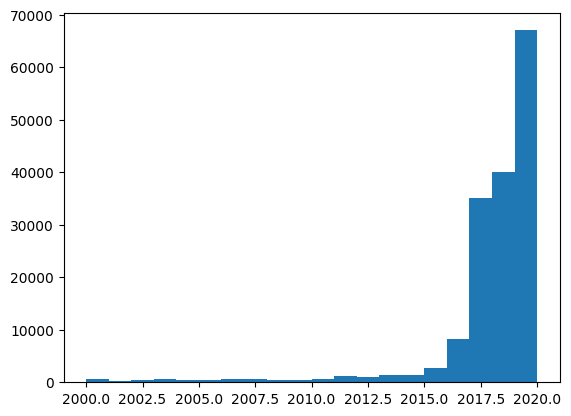

In [34]:
data_filtered_subset = data_filtered[data_filtered["Release_date"].dt.year >= 2000]

# Plot histogram
plt.hist(data_filtered_subset["Release_date"].dt.year, bins=20)